<a href="https://colab.research.google.com/github/NitinShindeJ/TensorFlow2.0/blob/master/My_learn_TF2.0/TF2_0_NLP_RNN_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.0.0-beta1  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0-beta1  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc3


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, LSTM, GlobalMaxPooling1D, Input, Embedding 
from tensorflow.keras.models import Model

In [6]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-04-25 11:56:32--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   482KB/s    in 1.0s    

2020-04-25 11:56:34 (482 KB/s) - ‘spam.csv’ saved [503663/503663]



In [7]:
!head spam.csv

UnicodeDecodeError: ignored

In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# rename columns to something better
df.columns = ['labels', 'data']

In [13]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [0]:
#Created Binary Labels
df['B_Labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['B_Labels'].values

In [19]:
#if we use . values the it converts the df to array
Y = df['B_Labels']#.values
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: B_Labels, Length: 5572, dtype: int64

In [0]:
#Split the data
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# Convert sentences to sequences
Max_Vocab_size = 20000
tokenizer = Tokenizer(num_words=Max_Vocab_size)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [58]:
#Get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s Unique Tokesn.' %V)

Found 7261 Unique Tokesn.


In [59]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (3733, 162)


In [60]:
# get sequence length
T = data_train.shape[1]

data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 162)


In [0]:
#Create the model

#We get to choosed embedding Dimensioality
#Hyper parameter so it is based on exp
D = 20

#Hidden satate Dimensioalaity
M =15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense (1, activation='sigmoid')(x)

model = Model (i, x)

In [0]:
#Compile & Fit
model.compile(
    loss = 'binary_crossentropy',
    optimizer= 'adam',
    metrics = ['accuracy']
)

In [63]:
print('Training model...')
r = model.fit(
  data_train,
  Y_train,
  epochs=10,
  validation_data=(data_test, Y_test)
)

Training model...
Epoch 1/10
117/117 [==============================] - 8s 68ms/step - loss: 0.4806 - accuracy: 0.8513 - val_loss: 0.3760 - val_accuracy: 0.8679
Epoch 2/10
117/117 [==============================] - 8s 65ms/step - loss: 0.3267 - accuracy: 0.8650 - val_loss: 0.2888 - val_accuracy: 0.8679
Epoch 3/10
117/117 [==============================] - 8s 66ms/step - loss: 0.2546 - accuracy: 0.8650 - val_loss: 0.2270 - val_accuracy: 0.8679
Epoch 4/10
117/117 [==============================] - 8s 65ms/step - loss: 0.1874 - accuracy: 0.8811 - val_loss: 0.1634 - val_accuracy: 0.9772
Epoch 5/10
117/117 [==============================] - 8s 65ms/step - loss: 0.1276 - accuracy: 0.9901 - val_loss: 0.1207 - val_accuracy: 0.9891
Epoch 6/10
117/117 [==============================] - 8s 65ms/step - loss: 0.0885 - accuracy: 0.9968 - val_loss: 0.0964 - val_accuracy: 0.9891
Epoch 7/10
117/117 [==============================] - 8s 65ms/step - loss: 0.0642 - accuracy: 0.9979 - val_loss: 0.0787 - va

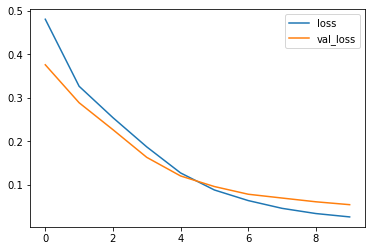

In [64]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

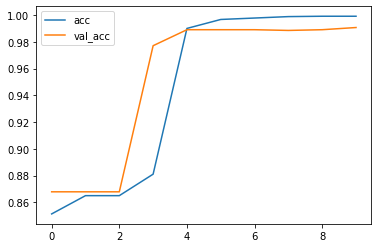

In [65]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()